In [ ]:
# Contrast Stretching
from PIL import Image
import matplotlib.image # can be used instead of Image
import matplotlib.pyplot as plt
from numpy import asarray
import numpy as np

In [ ]:
# 
def median_filter(image_array):
    image_shape = image_array.shape
    # taking the width and height of the image
    width = image_shape[1]
    height = image_shape[0]
    # total pixels
    total = width*height
    # converting the image to a vector to ease the computations
    # make a 1-dimensional view of arr
    vector = image_array.ravel().copy()
    vector_real = image_array.ravel().copy()
    print(f"before the loop : {len(vector_real)}")
    counter = 0
    print(vector.flags)
    l = np.amax(image_array)
    for index, x in enumerate(vector_real):
        if ((index+1)%width-1!=1 and index%width!=0 and index>width-1 and index<len(vector)-width-1): # aviod edges 2d arrays for median filter
            dim_9_array_to_pixel = np.array([
            vector_real[index-width-1],vector_real[index-width],vector_real[index-width+1],
            vector_real[index-1],vector_real[index],vector_real[index+1]
            ,vector_real[index+width-1],vector_real[index+width],vector_real[index+width+1]])
            median_pixel_value = np.median(dim_9_array_to_pixel) 
            vector[index] = median_pixel_value
            #vector[index] = 0
            counter += 1
    print(f"after the loop : {counter}")    
    # converting the vector back to the shape of the image
    image_array_after = np.asarray(vector).reshape(image_shape)
    return image_array_after

In [ ]:
# 
def average_filter(image_array):
    image_shape = image_array.shape
    # taking the width and height of the image
    width = image_shape[1]
    height = image_shape[0]
    # total pixels
    total = width*height
    # converting the image to a vector to ease the computations
    # make a 1-dimensional view of arr
    vector = image_array.ravel().copy()
    vector_real = image_array.ravel().copy()
    print(f"before the loop : {len(vector_real)}")
    counter = 0
    print(vector.flags)
    l = np.amax(image_array)
    for index, x in enumerate(vector_real):
        if ((index+1)%width-1!=1 and index%width!=0 and index>width-1 and index<len(vector)-width-1): # aviod edges 2d arrays for median filter
            dim_9_array_to_pixel = np.array([
            vector_real[index-width-1],vector_real[index-width],vector_real[index-width+1],
            vector_real[index-1],vector_real[index],vector_real[index+1]
            ,vector_real[index+width-1],vector_real[index+width],vector_real[index+width+1]])
            median_pixel_value = np.average(dim_9_array_to_pixel) 
            vector[index] = median_pixel_value
            #vector[index] = 0
            counter += 1
    print(f"after the loop : {counter}")    
    # converting the vector back to the shape of the image
    image_array_after = np.asarray(vector).reshape(image_shape)
    return image_array_after

(379, 395)
before the loop : 149705
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

after the loop : 148160


Text(0.5, 1.0, 'after')

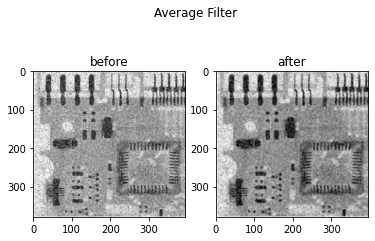

In [ ]:
image = Image.open("salt_pepper_image_2.png").convert('L')
# converting image to array
image_array = asarray(image)
# showing the shape of the image
print(image_array.shape)
# doing the clipping filter on the image array
image_array_after = average_filter(image_array)
# converting the image back from the array
image_after = Image.fromarray(image_array_after)
# showing the image before and after the operations
fig = plt.figure()
fig.suptitle("Average Filter")
fig.add_subplot(1, 2, 1)
# showing the image before range compression
plt.imshow(image, cmap="gray")
plt.title("before")
# showing the image after range compression
fig.add_subplot(1, 2, 2)
plt.imshow(image_after, cmap="gray")
plt.title("after")

(256, 256)
before the loop : 65536
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

after the loop : 64515
before the loop : 65536
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

after the loop : 64515
before the loop : 65536
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

after the loop : 64515


Text(0.5, 1.0, 'after')

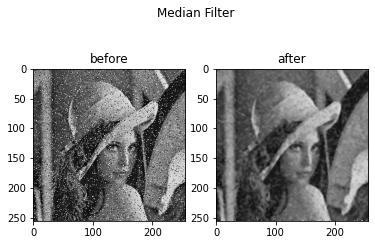

In [ ]:
image = Image.open("salt_pepper_image.jpg").convert('L')
# converting image to array
image_array = asarray(image)
# showing the shape of the image
print(image_array.shape)
# doing the clipping filter on the image array
image_array_after = median_filter(median_filter(image_array))
# converting the image back from the array
image_after = Image.fromarray(image_array_after)
# showing the image before and after the operations
fig = plt.figure()
fig.suptitle("Median Filter")
fig.add_subplot(1, 2, 1)
# showing the image before range compression
plt.imshow(image, cmap="gray")
plt.title("before")
# showing the image after range compression
fig.add_subplot(1, 2, 2)
plt.imshow(image_after, cmap="gray")
plt.title("after")